In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_tets = x_train/255.0, x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 36s 0us/step 


In [10]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size = 64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.3199 - loss: 1.9072 - val_accuracy: 0.3399 - val_loss: 180.5131
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.3918 - loss: 1.7307 - val_accuracy: 0.3895 - val_loss: 168.7571
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4181 - loss: 1.6520 - val_accuracy: 0.3707 - val_loss: 188.8063
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4375 - loss: 1.5996 - val_accuracy: 0.4097 - val_loss: 184.8618
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.4534 - loss: 1.5543 - val_accuracy: 0.4206 - val_loss: 178.9292
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4640 - loss: 1.5237 - val_accuracy: 0.4277 - val_loss: 188.4658
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4748 - loss: 1.4918 - val_accuracy: 0.4112 - val_loss: 215.1198
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4840 - l

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nLoss:", test_loss)
print("accuracy:", test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.4104 - loss: 197.1077

Loss: 197.10768127441406
accuracy: 0.41040000319480896


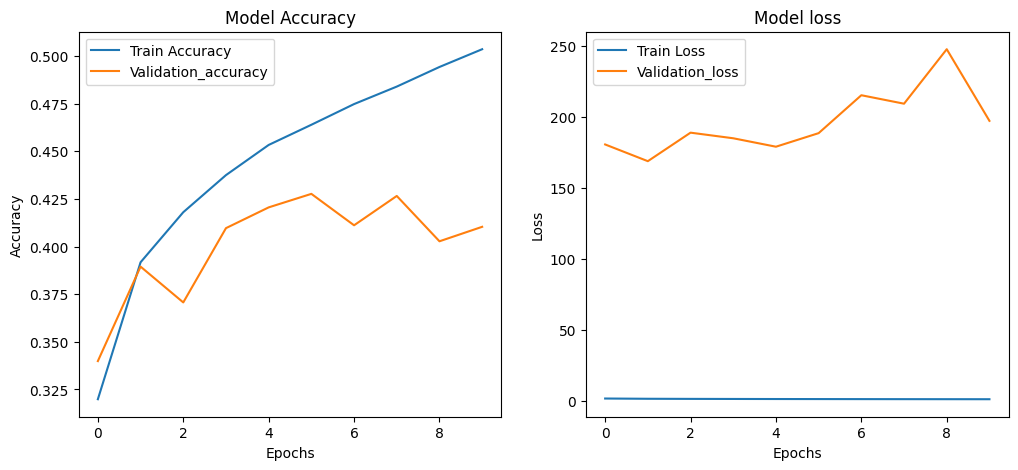

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs'),
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.title('Model loss')
plt.xlabel('Epochs'),
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
def plot_cifar(image, label, plt, i):
    plt.subplot(4, 5, i+1)
    plt.imshow(image)
    plt.title("label : [{int(label)}]")
    plt.axis('off')

plt.figure(figsize=(10, 8))
for i in range(20):
    plot_cifar_image(x_train[i], y_train[i], plt, i)
plt.show()

NameError: name 'plot_cifar_image' is not defined

<Figure size 1000x800 with 0 Axes>